<a href="https://colab.research.google.com/github/Bahman75/Classification-of-Different-Types-of-Blood-Cells/blob/bahman/b1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Check if drive is already mounted
import os
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive', force_remount=True)
else:
  print("Drive already mounted.")
%cd /content/drive/My Drive/[2024-2025] AN2DL/Homework 1

Drive already mounted.
/content/drive/My Drive/[2024-2025] AN2DL/Homework 1


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

np.random.seed(42)
tf.random.set_seed(42);
import pandas as pd

import random
import matplotlib.pyplot as plt
seed = 42

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np

data = np.load('training_set.npz')
x = data['images']
y = data['labels']

print("Dimensioni originali del dataset:", x.shape, y.shape)

# Calcola l'hash di ogni immagine
hashes = [hash(tuple(image.flatten())) for image in x]

# Trova gli indici dei duplicati
unique_indices = np.unique(hashes, return_index=True)[1]

# Estrai le immagini e le labels univoche
x = x[unique_indices]
y = y[unique_indices]

# Stampa le dimensioni del dataset dopo la rimozione dei duplicati
print("Dimensioni del dataset dopo la rimozione dei duplicati:", x.shape, y.shape)


#stampa delle occorrenze per ogni classe prima di qualsiasi ritocco
print('Counting occurrences of target classes:')
print(pd.DataFrame(y, columns=['digit'])['digit'].value_counts())

#sampling dei dati per equiparare le classi
smote = SMOTE(random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x.reshape(x.shape[0], -1), y)
x_resampled = x_resampled.reshape(-1,*x.shape[1:])

#normalizzazione
x_normalized = (x_resampled / 255).astype('float32')

print('\nCounting occurrences of target classes after SMOTE:')
print(pd.DataFrame(y_resampled, columns=['digit'])['digit'].value_counts())


#Convert labels to categorical format using one-hot encoding
y_resampled_encoded = tfk.utils.to_categorical(y_resampled)

x_train, x_val, y_train, y_val= train_test_split(x_resampled, y_resampled_encoded, test_size=0.1, random_state=seed, stratify=y_resampled)
# Define a mapping of labels to their corresponding digit names
labels = {0:'Basophil', 1:'Eosinophil', 2:'Erythroblast', 3:'Immature granulocytes', 4:'Lymphocyte', 5:'Monocyte', 6:'Neutrophil', 7:'Platelet'}

# Save unique labels
unique_labels = list(labels.values())
#Print the shapes of the loaded datasets
print("Training Data Shape:", x_train.shape)  # (numero di esempi, altezza immagine, larghezza immagine, canali colore)
print("Training Label Shape:", y_train.shape) # (numero di esempi, numero di classi)
print("Validation Data Shape:", x_val.shape)
print("Validation Label Shape:", y_val.shape)

Dimensioni originali del dataset: (13759, 96, 96, 3) (13759, 1)
Dimensioni del dataset dopo la rimozione dei duplicati: (11953, 96, 96, 3) (11953, 1)
Counting occurrences of target classes:
digit
6    2330
1    2179
3    2023
7    1643
2    1085
5     993
0     851
4     849
Name: count, dtype: int64

Counting occurrences of target classes after SMOTE:
digit
7    2330
0    2330
5    2330
3    2330
6    2330
2    2330
1    2330
4    2330
Name: count, dtype: int64
Training Data Shape: (16776, 96, 96, 3)
Training Label Shape: (16776, 8)
Validation Data Shape: (1864, 96, 96, 3)
Validation Label Shape: (1864, 8)


In [5]:
# Compare categorical label and "default" label representation
# Display the categorical label
print('Categorical label:', y_train[0])
# Display the equivalent numeric label
print('"Default" label:', np.argmax(y_train[0]))

Categorical label: [0. 0. 0. 1. 0. 0. 0. 0.]
"Default" label: 3


In [6]:
# Input shape for the model
input_shape = x_train.shape[1:]

# Output shape for the model
output_shape = y_train.shape[1]

print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

# Number of training epochs
epochs = 30

# Batch size for training
batch_size = 128

# Learning rate: step size for updating the model's weights
learning_rate = 0.001

# Print the defined parameters
print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Learning Rare:", learning_rate)

Input Shape: (96, 96, 3)
Output Shape: 8
Epochs: 30
Batch Size: 128
Learning Rare: 0.001


In [7]:
#AUGUMENTATION

datagen = ImageDataGenerator(
    rotation_range=360,  # Ruota le immagini di un angolo casuale tra 0 e 360 gradi
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range= (0.8, 1.2)
)


In [8]:
def build_model(input_shape, output_shape):
    # Define the input layer
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    # Feature extraction layers
    cnn = tfkl.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
    cnn = tfkl.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(cnn)
    cnn = tfkl.MaxPooling2D()(cnn)
    cnn = tfkl.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(cnn)
    cnn = tfkl.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(cnn)
    cnn = tfkl.MaxPooling2D()(cnn)
    cnn = tfkl.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(cnn)
    cnn = tfkl.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(cnn)
    cnn = tfkl.MaxPooling2D()(cnn)
    cnn = tfkl.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(cnn)
    cnn = tfkl.MaxPooling2D()(cnn)
    cnn = tfkl.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(cnn)


 # Flatten layer
    flatten = tfkl.Flatten()(cnn)

    # Dense layers
    dense = tfkl.Dense(units=64, activation='relu')(flatten)
    dense = tfkl.Dropout(0.5)(dense)  # Aggiunto Dropout per regolarizzazione
    dense = tfkl.Dense(units=32, activation='relu')(dense)

    # Output layer
    output_layer = tfkl.Dense(units=output_shape, activation='softmax')(dense)

    # Create the model
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='cnn_model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate), metrics=['accuracy'])

    return model


# Build the classifier model
model = build_model(input_shape, output_shape)







In [9]:
# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
# tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer (InputLayer)            │ (None, 96, 96, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d (Conv2D)                     │ (None, 96, 96, 32)           │           896 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_1 (Conv2D)                   │ (None, 96, 96, 32)           │         9,248 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ max_pooling2d (MaxPooling2D)        │ (None, 48, 48, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_2 (Conv2D)                   │ (None, 48, 48, 64)           │        18,496 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_3 (Conv2D)                   │ (None, 48, 48, 64)           │        36,928 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ max_pooling2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_4 (Conv2D)                   │ (None, 24, 24, 128)          │        73,856 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_5 (Conv2D)                   │ (None, 24, 24, 128)          │       147,584 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ max_pooling2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_6 (Conv2D)                   │ (None, 12, 12, 256)          │       295,168 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ max_pooling2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2d_7 (Conv2D)                   │ (None, 6, 6, 512)            │     1,180,160 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten (Flatten)                   │ (None, 18432)                │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 64)                   │     1,179,712 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout (Dropout)                   │ (None, 64)                   │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_1 (Dense)                     │ (None, 32)                   │         2,080 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_2 (Dense)                     │ (None, 8)                    │           264 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 2,944,392 (11.23 MB)

 Trainable params: 2,944,392 (11.23 MB)

 Non-trainable params: 0 (0.00 B)


Training on Fold 1...
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 67s 654ms/step - accuracy: 0.1251 - loss: 3.8347 - val_accuracy: 0.1234 - val_loss: 2.0797
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 53s 443ms/step - accuracy: 0.1356 - loss: 2.0791 - val_accuracy: 0.1223 - val_loss: 2.0798
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 35s 439ms/step - accuracy: 0.1276 - loss: 2.0793 - val_accuracy: 0.1223 - val_loss: 2.0797
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 35s 436ms/step - accuracy: 0.1225 - loss: 2.0793 - val_accuracy: 0.1223 - val_loss: 2.0798
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 436ms/step - accuracy: 0.1314 - loss: 2.0791 - val_accuracy: 0.1223 - val_loss: 2.0798
Fold 1 - Validation Accuracy: 0.1234

Training on Fold 2...
Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 44s 484ms/step - accuracy: 0.1335 - loss: 2.6964 - val_accuracy: 0.1836 - val_loss: 1.9889
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 75s 419ms/step - accuracy: 0.1630 - loss: 2.0411 - val_accuracy: 0.2932 - val_loss: 1.9227
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 34s 438ms/

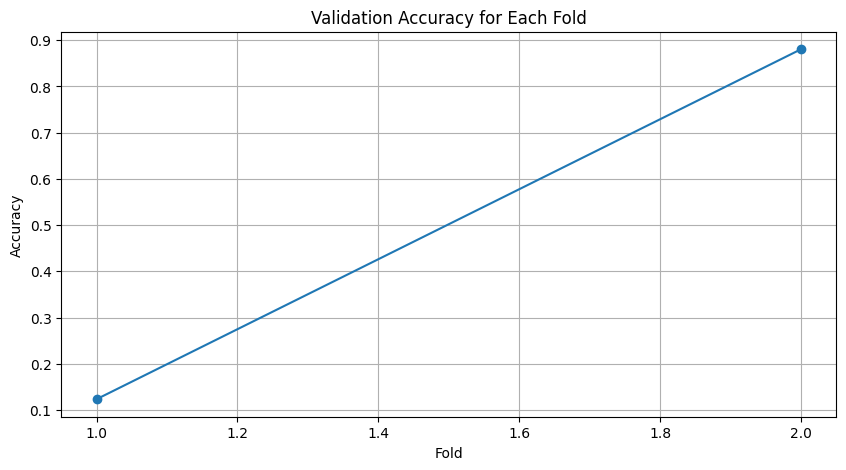

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


seed = 42

# Define the number of folds for cross-validation
n_splits = 2
kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

# Store the accuracy for each fold
accuracy_list = []
fold = 1

# K-Fold Cross Validation Loop
for train_index, val_index in kf.split(x_resampled):
    print(f"\nTraining on Fold {fold}...")

    # Split the dataset into training and validation sets for this fold
    x_train_fold, x_val_fold = x_resampled[train_index], x_resampled[val_index]
    y_train_fold, y_val_fold = y_resampled_encoded[train_index], y_resampled_encoded[val_index]

    # Build a new model for each fold
    model = build_model(input_shape, output_shape)

    # Define EarlyStopping callback
    early_stopping = tfk.callbacks.EarlyStopping(
        monitor='val_accuracy',
        mode='max',
        patience=4,
        restore_best_weights=True
    )

    # Data augmentation generator
    train_generator = datagen.flow(x_train_fold, y_train_fold, batch_size=batch_size)

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=(x_val_fold, y_val_fold),
        callbacks=[early_stopping],
        verbose=1
    ).history

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold} - Validation Accuracy: {val_acc:.4f}")

    accuracy_list.append(val_acc)
    fold += 1

# Calculate and print the mean and standard deviation of the accuracies
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation: {std_accuracy:.4f}")

# Plot accuracy across folds
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_splits + 1), accuracy_list, marker='o')
plt.title('Validation Accuracy for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


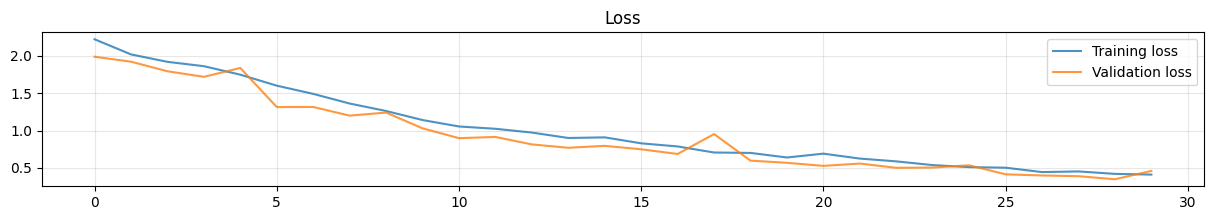

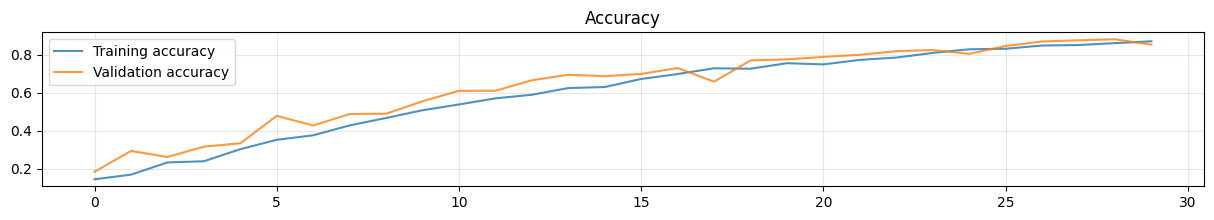

In [15]:
# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

model.save('weights.keras')
del model

In [16]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Overwriting model.py


In [17]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py weights.keras

from google.colab import files
files.download(filename)

  adding: model.py (deflated 56%)
  adding: weights.keras (deflated 15%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>